# 機械学習へのいざない（１１月１９日）
<!-- 本ページのnotebookは [こちら](notebooks.rst#scikit-learn) からダウンロードしてColabにアップロードしてください。 -->

下のアイコンをクリック。

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ymatumot/GSC/blob/master/ml.ipynb)

## 機械学習とは
Python言語の人気が近年高い理由として、機械学習分野への適用が挙げられる。機械学習とは、人が認知したり判断したりする処理をソフトウェアで模倣しコンピューターで実現することである。このソフトウェアの部分の実装に必要なライブラリがPythonには豊富に用意されている。

機械学習は大きく分けて次の3つに分類される。

* 教師あり学習
    * 入力データに対して出力（答え）がわかっている場合の学習
    * 過去の実績より新しいデータに対して答えを与える
    * 回帰問題：値を予測する
    * 分類（識別）問題：有限個のラベルに分ける

* 教師なし学習
    * 入力データに対して正解が与えられていない場合の学習
    * クラスタリング（集合を複数のグループに分ける）など
* 強化学習
    * ルールに基づき、予測に対して成果報酬を与えることで学習
    * 例：GoogleのAlphaGo

それぞれの学習では様々なアルゴリズムが提案されている。

例として、メタ（元Facebook）がほぼリアルタイムの翻訳（英語⇔福建語）機能を実装したデモストレーションを公開した。

<iframe width="800" height="450" src="https://www.youtube.com/embed/u0Y6aRoqfAc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Pythonと機械学習
これまで学んだように、Python言語はソフトウェアで何かを実現するためのハブとしての役割を担っている側面が大きい。ライブラリをインポートすることで、様々な用途に用いられるのが特徴である。機械学習分野においても同様で、多数のライブラリで構成される巨大なエコシステムが形成されている。以下では機械学習やディープラーニング分野でよく使われるライブラリについて紹介する。

### scikit-learn
![](https://scikit-learn.org/stable/_images/scikit-learn-logo-notext.png)

Pythonで機械学習をやろうと思ったら、まず**scikit-learn**である（ https://scikit-learn.org/stable/index.html ）。分類、回帰、クラスタリング、次元削減など、教師あり・なし学習に関する多数のアルゴリズムがscikit-learnでは用意されている。また、様々な学習用データをscikit-leanのモジュールを使ってロードすることもできる。

例えば、Pandasの演習で利用したアヤメのデータをロードしてみよう。scikit-learnでロードしたデータの構造は https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html を参照のこと。

In [1]:
from sklearn import datasets
import pandas as pd
df, target = datasets.load_iris(return_X_y=True, as_frame=True) #Dirctry convert to DataFrame with these options
df['species'] = target #target=species are separated. Classified by integers of 0, 1, 2.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


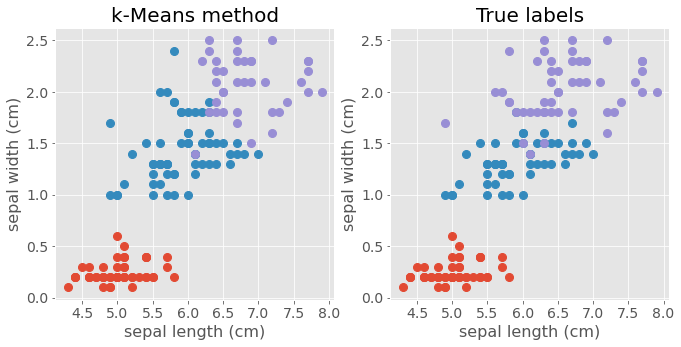

In [2]:
from sklearn import cluster
import matplotlib.pyplot as plt

label1 = df.keys()[0]
label2 = df.keys()[1]
label3 = df.keys()[2]
label4 = df.keys()[3]

# Clustering by k-Means method.
# Assuming 3 clusters (We already know the 3 species)
model = cluster.KMeans(n_clusters=3)
model.fit(df[[label1,label2,label3,label4]])
km_labels = model.labels_

# plots k-Means and True
plt.figure(figsize=(11,5))
plt.style.use('ggplot')

# k-Means result
plt.subplot(121)
plt.plot(df[label1][km_labels == 0],df[label4][km_labels == 0],'o',markersize=8)
plt.plot(df[label1][km_labels == 1],df[label4][km_labels == 1],'o',markersize=8)
plt.plot(df[label1][km_labels == 2],df[label4][km_labels == 2],'o',markersize=8)
plt.xlabel(label1,fontsize=16)
plt.ylabel(label2,fontsize=16)
plt.title('k-Means method',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# True labeling
plt.subplot(122)
plt.plot(df[label1][df['species'] == 0],df[label4][df['species'] == 0],'o',markersize=8)
plt.plot(df[label1][df['species'] == 1],df[label4][df['species'] == 1],'o',markersize=8)
plt.plot(df[label1][df['species'] == 2],df[label4][df['species'] == 2],'o',markersize=8)
plt.xlabel(label1,fontsize=16)
plt.ylabel(label2,fontsize=16)
plt.title('True labels',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

左図がk平均法でクラスタリングした結果で、右図が元のデータセットに含まれていたラベルによるグループ分けである。それぞれのマーカーの色はあくまで分類のために変えており、左右で色は必ずしも一致しない。孤立したグループはk平均法で正確に分類できていることがわかる。重なっている領域はどうしても難しいが、それでも、それなりに良い精度で分類できているのではないだろうか。

上記の例のように、scikit-learnのライブラリを使うとわずか数行で教師なし学習ができてしまうのである。

### ディープラーニングフレームワーク
機械学習のうち、教師あり学習で大きなブームとなっているのが、ニューラルネットワークである。ニューラルネットワークは脳の神経細胞であるニューロン（下図、 https://en.wikipedia.org/wiki/Artificial_neural_network より）の働きを数理モデル化したものである。

![neuron](./img/neuron.png)

ニューロンは、電気信号が入力され、その大きさがある閾値値を超えると発火して電気信号を出力するような、非線形応答を行う。出力は別の複数のニューロンへの入力となっており、多数のニューロンが結合してネットワークを構成している。ニューラルネットワークはこれらの働きを数理的に模擬している。例えば、いわゆる全結合ニューラルネットワークは、以下の図（ https://en.wikipedia.org/wiki/Artificial_neural_network より）のように構成されている。

![neural_network](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/500px-Artificial_neural_network.svg.png)

各ノード点がニューロンを表し、それぞれを結んでいる線が信号の入力・出力を表現している。また出力は各ノードで定義される非線形な活性化関数によって決まる。一番左から「入力層」、「隠れ層」、「出力層」と呼ばれ、出力層からの出力結果が最終的な答えとなる。このようなノード間の結合は以下の数理モデルで表すことができる。

![nn_model](./img/nn_model.png)

このように数式で表すことができれば、プログラム言語で実装が可能である。その他にも、最終出力と正解を比べながら、各ノード間の結合の割合（重みとバイアス）を更新していく「学習」も最適化問題として数式で表現できる。

ニューラルネットワークの発明は１９６０年台に遡ることができる。従って、ニューラルネットワークによる学習自体は比較的歴史のある概念である。事実、過去にもニューラルネットワークがもてはやされたことがあった。実は今回のブームは３回目で、発端は２０１２年、画像から物体の認識率を競うImageNet Large Scale Visual Recognition Challenge (ILSVRC) で、カナダのヒントン教授らのチームがディープラーニング（深層学習）の技術で圧勝したことに始まっている。ディープラーニングとは、隠れ層の数が何層にもなる多層ニューラルネットワークによる学習のことで、ヒントンチームのネットワークは隠れ層数が７層であった。２０１２年のILSVRCの優勝によってディープラーニングの大きな可能性を世に示したことが、現在の大きなブームにつながっている。

また、ディープラーニングが社会に広まった理由に、プログラミングのフレームワークが公開されていることにある。最新のアルゴリズムを取り入れながら巨大なネットワークをプログラミングすることは必ずしも容易ではない。しかし、ディープラーニングフレームワークはネットワークの設計、最新のアルゴリズムの導入をわずか数〜数１０行のプログラミングで実装することを可能にしている。現在、ディープラーニングフレームワークのとして主に以下の２つが挙げられる。

* TensorFlow (Google) - https://www.tensorflow.org/?hl=ja
* PyTorch (Facebook) - https://pytorch.org/

いずれも、主にPython言語で書かれており、ユーザーはこれらライブラリをインポートすることでニューラルネットワークの構築を迅速に行うことができる。例えば、PyTorchを使ったネットワークの設計は以下の10数行で記述できる。

```python
import torch
import torch.nn as nn

#全結合ニューラルネットワーク（MLP）クラスの定義（授業ではやっていない）
class MLP(nn.Module):
    def __init__(self, in_features, hidden_features1, hidden_features2, out_features):
        super(MLP, self).__init__()
        self.input_layer = nn.Linear(in_features, hidden_features1)
        self.hidden_layer1 = nn.Linear(hidden_features1, hidden_features2)
        self.hidden_layer2 = nn.Linear(hidden_features2, out_features)

    def forward(self, x):
        x = self.input_layer(x)
        x = torch.relu(x)
        x = self.hidden_layer1(x)
        x = torch.relu(x)
        x = self.hidden_layer2(x)
        return x

# 入力データの準備
x = torch.randn(10, 10)

# MLPのインスタンス化
mlp = MLP(10, 20, 30, 10)

# MLPの推論
output = mlp(x)

# 出力データの表示
print(output)
```
上の例は、入力層のノード数が`10`、隠れ層が2層でそれぞれのノード数が`20`、`30`、出力が`10`の、全結合ネットワークを定義するクラス（モジュールのようなもの）を定義し、ランダムに10セットのデータを作成し、演算結果を出力している。 **学習過程は含まれていないことに注意。** このようなクラスを用意しておくだけで、学習・最適化などが簡単にできるのである。また、フレームワークからGPUの高い演算能力を簡単に使用することも可能である。このように、フレームワークの公開、GPUへの簡単な利用方法が普及したことで、ディープラーニングへの敷居が大幅に低くなったため、社会利用が進んでいるという状況にある。

<!-- ## 演習問題 (Exercise)
### 日本語版
以下のうちの一つを選んでjupyter notebook形式で提出してください。（機械学習を使う必要はありません。）

* 研究テーマに適用することが難しい場合は、 https://www.mhlw.go.jp/stf/covid-19/open-data.html にある複数のデータを解析して図示して考察してください。
 -->